Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
dataset.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Get information about the dataset

In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Find the correlation between all fields

In [5]:
correlation_matrix = dataset.corr()

In [6]:
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

Data Visualization

In [7]:
#Count the number of patients with and without heart disease
heart_disease_counts = dataset['target'].value_counts()

In [8]:
print(heart_disease_counts)


target
1    165
0    138
Name: count, dtype: int64


In [9]:
print(heart_disease_counts.index)

Index([1, 0], dtype='int64', name='target')


In [10]:
having_heart_disease = len(dataset[dataset.target==1])
not_having_heart_disease = len(dataset[dataset.target==0])


In [11]:
print(having_heart_disease)
print(not_having_heart_disease)

165
138


c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


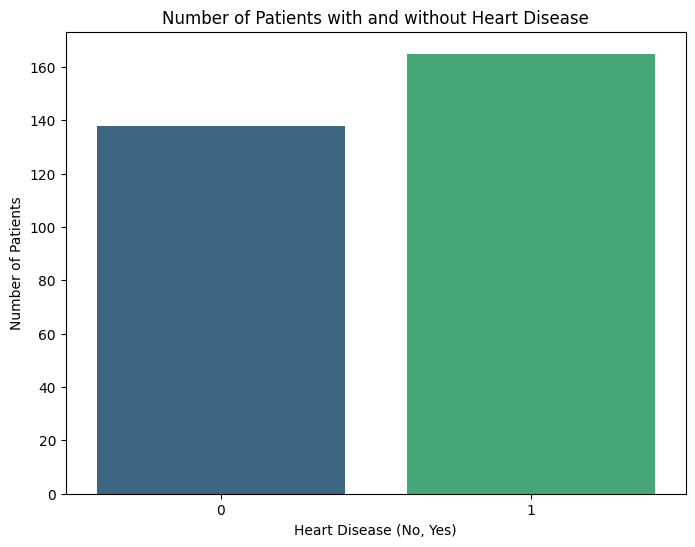

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette="viridis")
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (No, Yes)')
plt.ylabel('Number of Patients')
plt.show()

In [13]:
#visualize the age and whether a patient has disease or not

c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

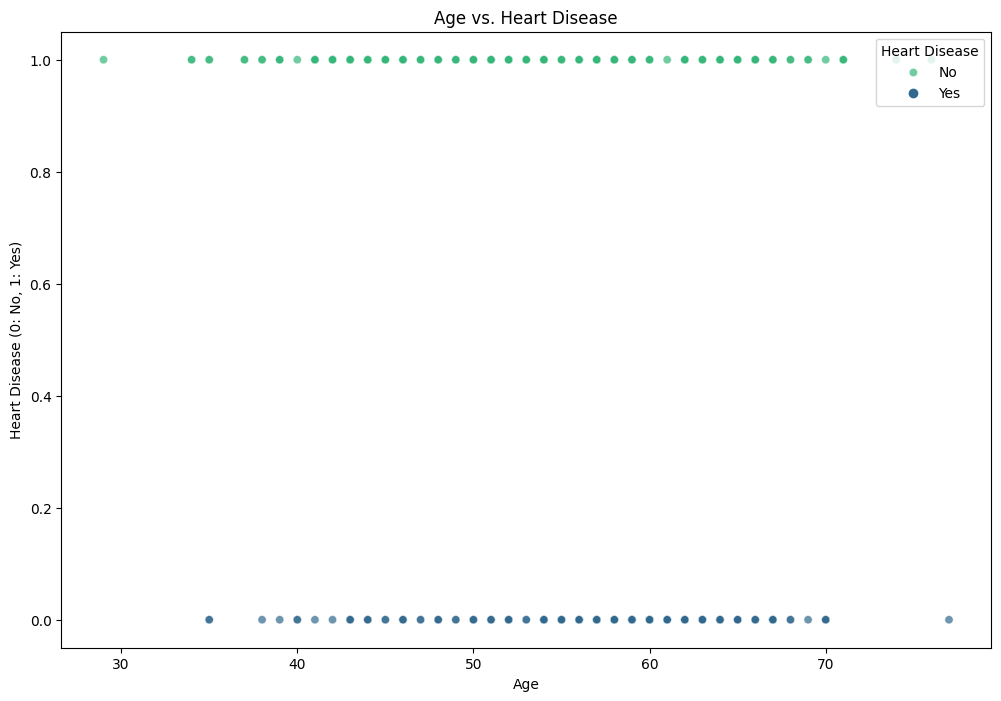

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='target', data=dataset, hue='target', palette="viridis", alpha=0.7)
plt.title('Age vs. Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [15]:
#visualize correlation between all features using a heat map

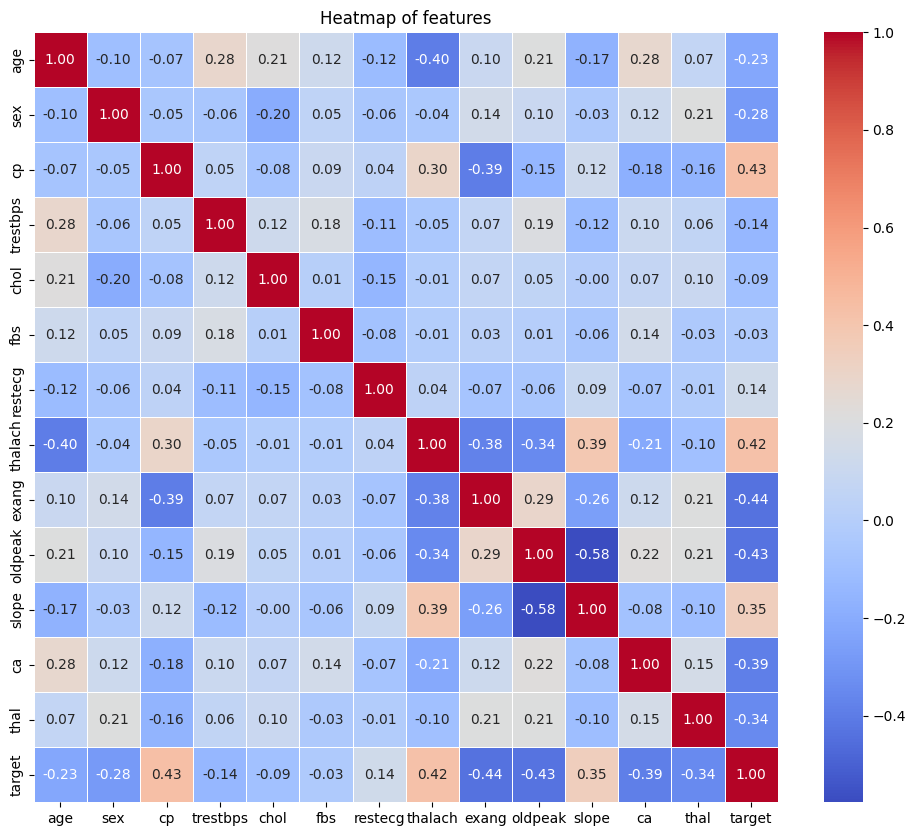

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",linewidths=.5)
plt.title('Heatmap of features')
plt.show()

In [17]:
x= pd.DataFrame(dataset.iloc[:,:-1])
y= pd.DataFrame(dataset.iloc[:,-1])

In [18]:
#import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, train_size=0.7)

In [19]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

#Create instance (i.e. object) of Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)


c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = logmodel.predict(X_test)
y_pred


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [21]:
print("Accuracy: %d", (logmodel.score(X_test, Y_test)))

Accuracy: %d 0.8021978021978022


EVALUATE MODEL USING CONFUSION MATRIX

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[32 16]
 [ 2 41]]


In [23]:
(32+43)/(32+43+6+10)

0.8241758241758241

In [24]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [25]:
metrics(Y_test,y_pred)

Accuracy: 0.80220
Precision: 0.71930
Recall: 0.95349
F1-score: 0.82000


In [26]:
from sklearn.tree import export_graphviz
import graphviz 


Decision Tree Classifier

In [28]:
#Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
y_pred= classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[28 20]
 [ 7 36]]


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.7032967032967034


In [32]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(classifier, out_file=None, 
                           feature_names=x.columns,
                           class_names=['No Heart Disease', 'Heart Disease'], 
                           filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Save the graph to a PDF file or display it
#graph.render("logistic_regression_model", format="pdf", cleanup=True)

In [33]:
graph.view()

'Source.gv.pdf'

5.Random Forest Model

In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict (X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [35]:
#Import scikit-learn metrics module for performance metrics
from sklearn import metrics
#Building the confusion matrix
metrics.confusion_matrix(Y_test,y_pred)

array([[33, 15],
       [ 3, 40]], dtype=int64)

In [36]:
metrics.accuracy_score(Y_test, y_pred)


0.8021978021978022

6. Select the best model

In [37]:
#a. Print the confusion matrix of all classifiers
from sklearn.metrics import confusion_matrix
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Iterate through classifiers and print confusion matrix
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    
    print(f"Confusion Matrix for {clf_name}:")
    print(cm)
    print("\n")

Confusion Matrix for Logistic Regression:
[[32 16]
 [ 2 41]]


Confusion Matrix for Decision Tree:
[[28 20]
 [ 8 35]]


Confusion Matrix for Random Forest:
[[33 15]
 [ 3 40]]




c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [38]:
#b. Print the classification report of all classifiers

from sklearn.metrics import classification_report

for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(Y_test, y_pred)
    
    print(f"Classification Report for {clf_name}:")
    print(report)
    print("\n")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78        48
           1       0.72      0.95      0.82        43

    accuracy                           0.80        91
   macro avg       0.83      0.81      0.80        91
weighted avg       0.84      0.80      0.80        91



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        48
           1       0.65      0.79      0.72        43

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.71      0.70      0.70        91



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        48
           1       0.71      0.93      0.81        43

    accuracy                           0.79      

c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [45]:
#c. Calculate Recall Precision and F1 score of all the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Iterate through classifiers and calculate recall, precision, and F1 score
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
print(f"Metrics for {clf_name}:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\n")


Metrics for Random Forest:
Precision: 0.8272
Recall: 0.8022
F1 Score: 0.8002




c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score




X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Store metrics in a dictionary
metrics_dict = {}

# Iterate through classifiers 
for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    
    metrics_dict[clf_name] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print metrics for all classifiers
for clf_name, metrics in metrics_dict.items():
    print(f"Metrics for {clf_name}:")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("\n")


Metrics for Logistic Regression:
Precision: 0.8855
Recall: 0.8852
F1 Score: 0.8851


Metrics for Decision Tree:
Precision: 0.8633
Recall: 0.8525
F1 Score: 0.8521


Metrics for Random Forest:
Precision: 0.8700
Recall: 0.8689
F1 Score: 0.8685




c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

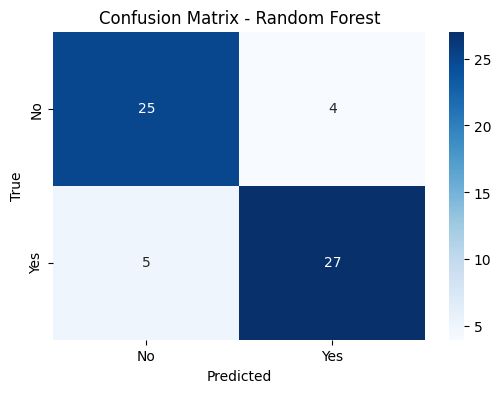

In [52]:
#d. Visualize confusion matrix using heatmaps

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix - {clf_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


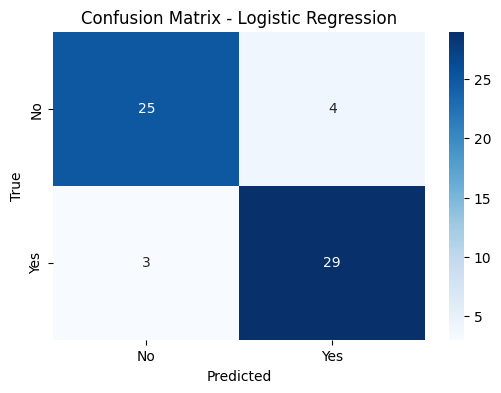

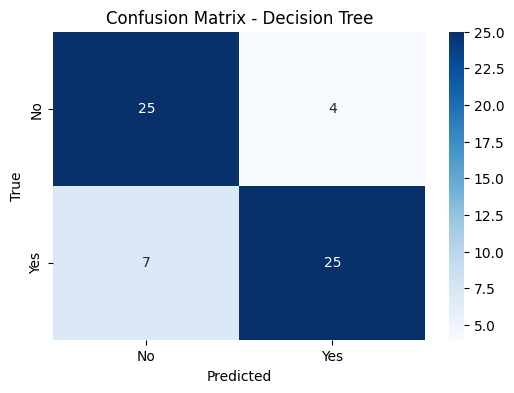

c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


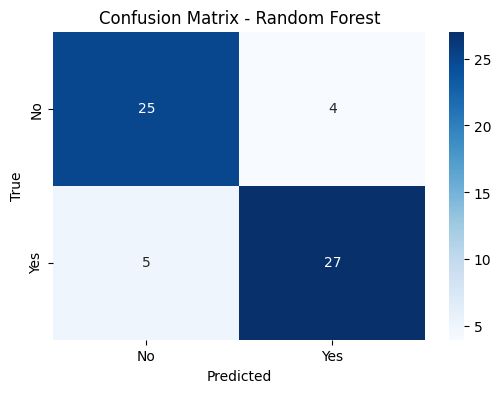

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [56]:
#e. Select the best model based on the best accuracies


from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

#Ideal Assumption
best_model_name = None
best_accuracy = 0.0

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for {clf_name}: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = clf_name

print(f"\nThe best model is: {best_model_name} with accuracy {best_accuracy:.4f}")


Accuracy for Logistic Regression: 0.8852
Accuracy for Decision Tree: 0.8361
Accuracy for Random Forest: 0.8689

The best model is: Logistic Regression with accuracy 0.8852


c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\PRASAD wORKS\Python Works\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,